## Data Preprocessing Lab: Time Series and Text (NLP)

This lab covers two core preprocessing workflows:

1. Time Series preprocessing (indexing, resampling, handling missing data)
2. Text preprocessing (cleaning, tokenization, vectorization)

## Part 1: Time Series Preprocessing

We will use a synthetic dataset simulating daily temperature readings over several months.

In [9]:
import pandas as pd
import numpy as np

# Generate synthetic time series data
np.random.seed(42)
date_rng = pd.date_range(start='2023-01-01', end='2023-04-30', freq='D')
temperature = np.random.normal(loc=15, scale=5, size=len(date_rng))
df_ts = pd.DataFrame({'Date': date_rng, 'Temperature': temperature})
df_ts.loc[np.random.choice(df_ts.index, 10), 'Temperature'] = np.nan  # add missing values
df_ts.set_index('Date', inplace=True)

df_ts.head()

,Temperature
Date,
2023-01-01,17.483571
2023-01-02,14.308678
2023-01-03,18.238443
2023-01-04,22.615149
2023-01-05,13.829233


### Plot the Time Series

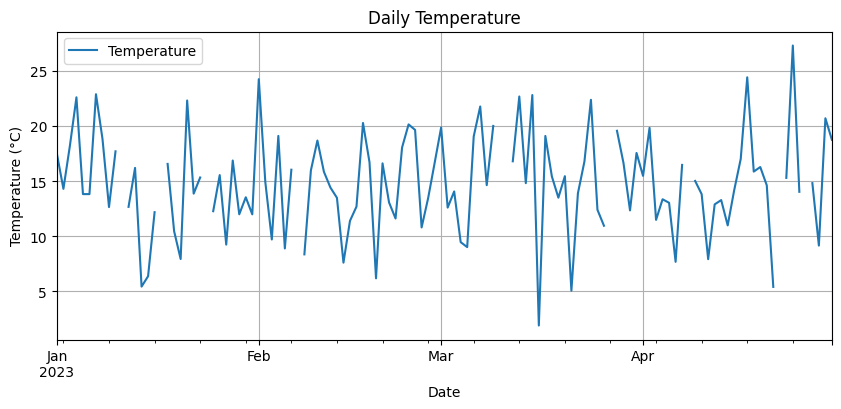

In [10]:
import matplotlib.pyplot as plt

df_ts.plot(figsize=(10, 4), title='Daily Temperature')
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.show()

### Fill Missing Values and Resample

In [11]:
# Interpolate missing values
df_filled = df_ts.interpolate()

# Resample to weekly average
df_weekly = df_filled.resample('W').mean()

df_weekly.head()

,Temperature
Date,
2023-01-01,17.483571
2023-01-08,17.793437
2023-01-15,12.321097
2023-01-22,13.962489
2023-01-29,13.585505


### Exercise 1: Time Series Handling


- Count the number of missing values in `df_ts`
- Fill missing values using forward fill instead of interpolation
- Plot both original and filled time series for comparison


Missing values count:
Temperature    10
dtype: int64


/var/folders/z4/6n0dchns6912pl7j3t761pxr0000gn/T/ipykernel_20658/2276503289.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ffill = df_ts.fillna(method='ffill')


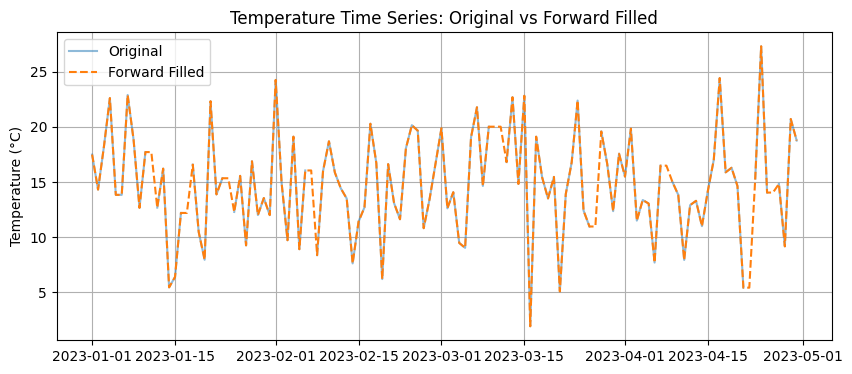

In [12]:
# Count missing values
missing_count = df_ts.isnull().sum()
print(f"Missing values count:\n{missing_count}")

# Fill missing values using forward fill
df_ffill = df_ts.fillna(method='ffill')

# Plot original and filled time series
plt.figure(figsize=(10, 4))
plt.plot(df_ts.index, df_ts['Temperature'], label='Original', alpha=0.5)
plt.plot(df_ffill.index, df_ffill['Temperature'], label='Forward Filled', linestyle='--')
plt.title('Temperature Time Series: Original vs Forward Filled')
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()

## Part 2: Text Preprocessing (NLP)

We will use a small corpus of text to explore common text preprocessing techniques.

In [13]:
documents = [
    "Natural Language Processing (NLP) is a subfield of AI.",
    "It focuses on understanding and generating human language.",
    "Text preprocessing is a crucial step in NLP pipelines.",
    "Common techniques include tokenization, stopword removal, and stemming."
]

### Basic Text Cleaning

In [15]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z\s]", "", text)
    return text

cleaned_docs = [clean_text(doc) for doc in documents]
cleaned_docs

['natural language processing nlp is a subfield of ai',
 'it focuses on understanding and generating human language',
 'text preprocessing is a crucial step in nlp pipelines',
 'common techniques include tokenization stopword removal and stemming']

### Tokenization and Stopword Removal

In [16]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

def tokenize(text):
    return [word for word in text.split() if word not in ENGLISH_STOP_WORDS]

tokenized_docs = [tokenize(doc) for doc in cleaned_docs]
tokenized_docs

[['natural', 'language', 'processing', 'nlp', 'subfield', 'ai'],
 ['focuses', 'understanding', 'generating', 'human', 'language'],
 ['text', 'preprocessing', 'crucial', 'step', 'nlp', 'pipelines'],
 ['common',
  'techniques',
  'include',
  'tokenization',
  'stopword',
  'removal',
  'stemming']]

### Vectorization with CountVectorizer

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_counts = vectorizer.fit_transform(cleaned_docs)
pd.DataFrame(X_counts.toarray(), columns=vectorizer.get_feature_names_out())

,ai,and,common,crucial,focuses,generating,human,in,include,is,...,processing,removal,stemming,step,stopword,subfield,techniques,text,tokenization,understanding
0,1,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
1,0,1,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0,1,0,1,...,0,0,0,1,0,0,0,1,0,0
3,0,1,1,0,0,0,0,0,1,0,...,0,1,1,0,1,0,1,0,1,0


### Exercise 2: Text Preprocessing


- Write a function to clean and tokenize a list of new documents
- Use `TfidfVectorizer` to vectorize them
- Print the TF-IDF matrix


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

new_docs = ["Language models are powerful tools.", 
            "Preprocessing affects model performance.",
            "Language models are powerful tools for natural language processing.",
            "Preprocessing affects model performance significantly in machine learning.",
            "TF-IDF is a numerical statistic used to reflect importance of words.",
            "Text mining and information retrieval benefit from proper tokenization.",
            "Stop words removal and stemming are common preprocessing steps."]
tfidf = TfidfVectorizer(stop_words='english')
X_tfidf = tfidf.fit_transform(new_docs)
pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

,affects,benefit,common,idf,importance,information,language,learning,machine,mining,...,statistic,stemming,steps,stop,text,tf,tokenization,tools,used,words
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000
1,0.517737,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.635559,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.317779,0.000000,0.000000
3,0.351701,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.423692,0.423692,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.360632,0.360632,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.360632,0.000000,0.000000,0.000000,0.000000,0.360632,0.000000,0.000000,0.360632,0.299355
5,0.000000,0.377964,0.000000,0.000000,0.000000,0.377964,0.000000,0.000000,0.000000,0.377964,...,0.000000,0.000000,0.000000,0.000000,0.377964,0.000000,0.377964,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.401854,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.401854,0.401854,0.401854,0.000000,0.000000,0.000000,0.000000,0.000000,0.333573
